### Modeling Suicide Rates in Mexico
#### Final Project
Team: Victor González | Felipe Murillo | Marcela A. Vasquez

TEC Data Bootcamp | 2020

This Jupyter notebok performs the following tasks:
1. Import modeling data
1. Convert category data into numerical
1. Use MinMaxScaler to scale data
1. Splits data into training and test sets
1. Tries various regression models to best fit data

---

### Import dependencies

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Import data 

In [16]:
# Read the csv file into a pandas DataFrame
mxData = pd.read_csv('../Data/Mexico Research Data/mexModel.csv', index_col=0)
mxData.head()

,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,unemployment,divorce,obesity,alcohol,migration
0,1987,male,5-14 years,36,10423000,0.35,"140,263,387,027",2064,Generation X,0.0,0.0,5.5,4.70,-4.591
1,1987,female,5-14 years,16,10086000,0.16,"140,263,387,027",2064,Generation X,0.0,0.0,4.2,4.70,-4.591
2,1988,male,5-14 years,46,10438000,0.44,"183,144,164,357",2630,Generation X,0.0,0.0,5.8,4.49,-4.591
3,1988,female,5-14 years,15,10101000,0.15,"183,144,164,357",2630,Generation X,0.0,0.0,4.4,4.49,-4.591
4,1989,male,5-14 years,40,10466000,0.38,"222,977,046,516",3125,Generation X,0.0,0.0,6.1,5.10,-4.591


In [17]:
mxData.columns

Index(['year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation',
       'unemployment', 'divorce', 'obesity', 'alcohol', 'migration'],
      dtype='object')

### Extract X and y values from data set to build model

In [18]:
#X = mxData[["year", "sex", "age","population","gdp_per_capita ($)"]]
X = mxData[["year", "sex", "age","population","gdp_per_capita ($)","unemployment","divorce","obesity","alcohol","migration"]]
y = mxData["suicides/100k pop"].values.reshape(-1, 1)
print(X.shape, y.shape)

(298, 10) (298, 1)


### Convert categories to numerical values and split data into train/test data

In [19]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,year,population,gdp_per_capita ($),unemployment,divorce,obesity,alcohol,migration,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
224,2009,11560068,8651,0.000000,0.00,10.7,4.37,-1.022,1,0,0,0,0,1,0,0
78,1997,3962305,5864,3.735000,0.43,56.7,4.76,-4.820,1,0,0,0,0,0,1,0
66,1996,3868948,4904,5.525000,0.42,56.1,5.26,-4.820,1,0,0,0,0,0,1,0
295,2015,11790898,10228,0.000000,0.00,16.3,4.24,-0.478,0,1,0,0,0,1,0,0
280,2014,9978692,11663,4.874411,0.90,65.1,3.94,-0.716,1,0,0,1,0,0,0,0


In [20]:
X.columns

Index(['year', 'population', 'gdp_per_capita ($)', 'unemployment', 'divorce',
       'obesity', 'alcohol', 'migration', 'sex_female', 'sex_male',
       'age_15-24 years', 'age_25-34 years', 'age_35-54 years',
       'age_5-14 years', 'age_55-74 years', 'age_75+ years'],
      dtype='object')

### Scale data

In [21]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

In [22]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

### 1st Model: Linear Regression

In [23]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

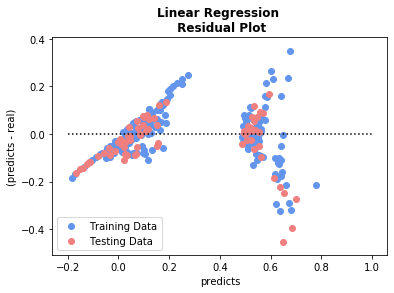

In [24]:
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="cornflowerblue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="lightcoral", label="Testing Data")
plt.legend(loc="lower left")
plt.hlines(y=0, xmin=-0.2, xmax=X_test_scaled.max(), linestyle =":")
plt.title("Linear Regression \n Residual Plot",weight="bold")
plt.xlabel("predicts")
plt.ylabel("(predicts - real)")
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.012699015748161754, R2: 0.8499414002643942


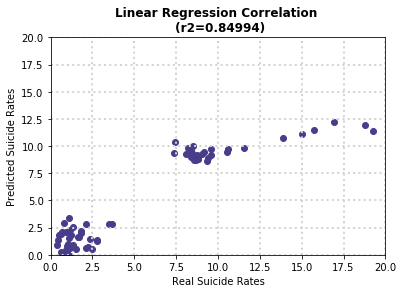

In [26]:
plt.scatter(y_test, y_scaler.inverse_transform(predictions), color = "darkslateblue")
plt.xlim(0,20)
plt.ylim(0,20)
plt.ylabel("Predicted Suicide Rates")
plt.xlabel("Real Suicide Rates")
plt.grid(color='lightgray', linestyle=':', linewidth=2)
plt.title(f"Linear Regression Correlation \n (r2={round(model.score(X_test_scaled, y_test_scaled),5)})",weight="bold")
plt.show()

### 2nd Model: Polynomial Features + Ridge Regression

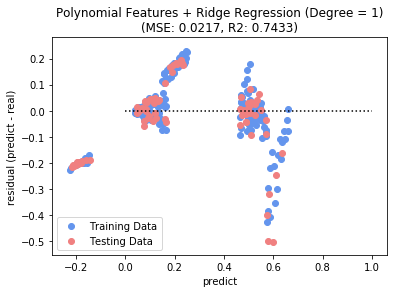

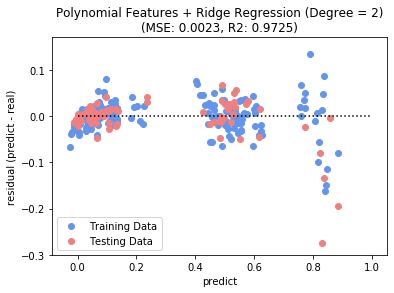

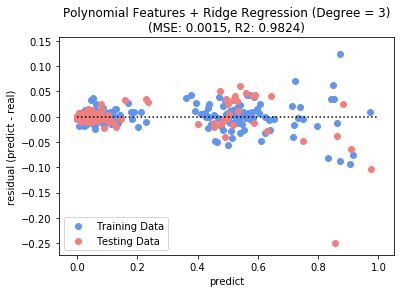

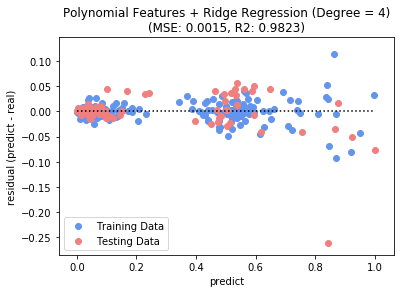

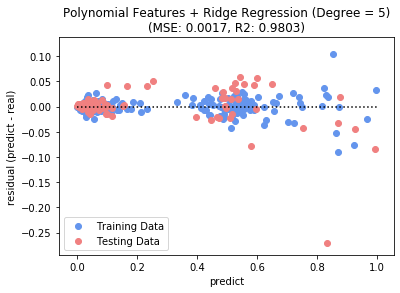

In [27]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

for count, degree in enumerate([1,2, 3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X_train_scaled, y_train_scaled)
    predictions = model.predict(X_test_scaled)
    MSE = mean_squared_error(y_test_scaled, predictions)
    r2 = model.score(X_test_scaled, y_test_scaled)
    plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="cornflowerblue", label="Training Data")
    plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="lightcoral", label="Testing Data")
    plt.legend(loc='lower left')
    plt.hlines(y=0, xmin=X_test_scaled.min(), xmax=X_test_scaled.max(), linestyle =":")
    plt.title(f"Polynomial Features + Ridge Regression (Degree = {degree})\n(MSE: {round(MSE,4)}, R2: {round(r2,4)})")
    plt.ylabel("residual (predict - real)")
    plt.xlabel("predict")
    plt.show()


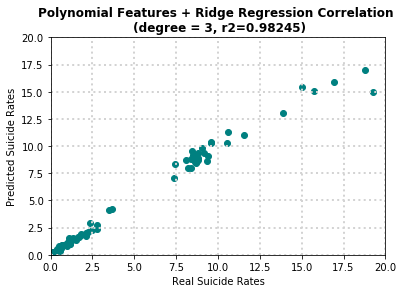

In [28]:
model = make_pipeline(PolynomialFeatures(3), Ridge())
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)

plt.scatter(y_test, y_scaler.inverse_transform(predictions), color = "teal")
plt.xlim(0,20)
plt.ylim(0,20)
plt.ylabel("Predicted Suicide Rates")
plt.xlabel("Real Suicide Rates")
plt.grid(color='lightgray', linestyle=':', linewidth=2)
plt.title(f"Polynomial Features + Ridge Regression Correlation \n (degree = 3, r2={round(model.score(X_test_scaled, y_test_scaled),5)})",weight="bold")
plt.show()

### 3rd Model: Random Forests Regression

In [29]:
from sklearn.ensemble import RandomForestRegressor

degrees = []
mse_train = []
mse_test = []
maxTestR = 0

for estimator in np.arange(1,400,10):
    degrees.append(estimator)
    regressor = RandomForestRegressor(n_estimators=estimator, random_state=0)
    regressor.fit(X_train_scaled, np.ravel(y_train_scaled))
    #
    predictions_test = regressor.predict(X_test_scaled)
    MSE_test = mean_squared_error(y_test_scaled, predictions_test)
    r2=regressor.score(X_test_scaled, y_test_scaled)
    if r2 > maxTestR:
        maxTestR = r2
        maxDeg = estimator
    #
    predictions_train = regressor.predict(X_train_scaled)
    MSE_train = mean_squared_error(y_train_scaled, predictions_train)
    #
    mse_train.append(MSE_train)
    mse_test.append(MSE_test)

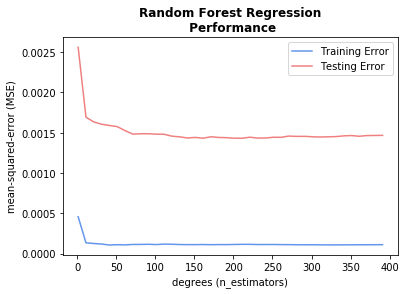

In [30]:
plt.plot(degrees,mse_train, c="cornflowerblue", label="Training Error")
plt.plot(degrees,mse_test, c="lightcoral", label="Testing Error")
plt.legend(loc='upper right')
plt.xlabel("degrees (n_estimators)")
plt.ylabel("mean-squared-error (MSE)")
plt.title(f"Random Forest Regression\n Performance", weight='bold')
plt.show()

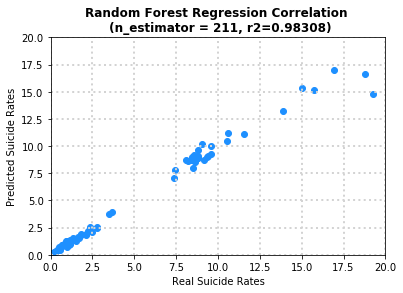

In [31]:
n_est = maxDeg
regressor = RandomForestRegressor(n_estimators=n_est, random_state=0)
regressor.fit(X_train_scaled, np.ravel(y_train_scaled))
predictions = regressor.predict(X_test_scaled)

plt.scatter(y_test, y_scaler.inverse_transform(predictions.reshape(-1, 1)), color = "dodgerblue")
plt.xlim(0,20)
plt.ylim(0,20)
plt.ylabel("Predicted Suicide Rates")
plt.xlabel("Real Suicide Rates")
plt.grid(color='lightgray', linestyle=':', linewidth=2)
plt.title(f"Random Forest Regression Correlation \n (n_estimator = {n_est}, r2={round(regressor.score(X_test_scaled, y_test_scaled),5)})",weight="bold")
plt.show()

Text(0.5, 1.0, 'Feature Importance (Suicide Rates)')

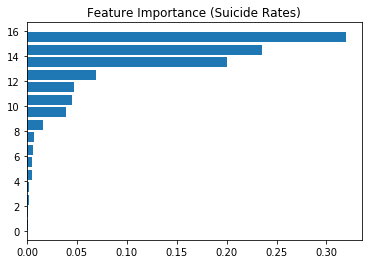

In [32]:
feature_importance = regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.title('Feature Importance (Suicide Rates)')

In [33]:
sorted_idx = np.argsort(feature_importance)
sorted_idx

array([ 7, 14, 12, 11,  2,  6,  0, 10, 15,  5,  4,  3,  1, 13,  9,  8])

In [34]:
feature_importance[sorted_idx]

array([0.00097244, 0.00104515, 0.00159736, 0.00224806, 0.00469471,
       0.00489412, 0.00574439, 0.0072859 , 0.01579605, 0.03901782,
       0.04484361, 0.0471607 , 0.06927325, 0.2003319 , 0.23571142,
       0.31938314])

Text(0.5, 1.0, 'Feature Importance (Suicide Rates)')

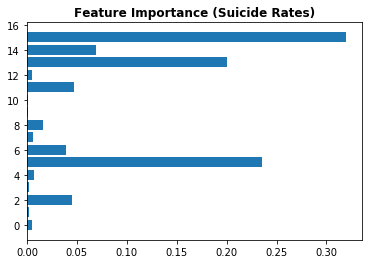

In [35]:
plt.barh(sorted_idx, feature_importance, align='center')
plt.title('Feature Importance (Suicide Rates)',weight="bold")

### 4th Model: Gradient Tree Boosting

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

degrees = []
mse_train = []
mse_test = []
maxTestR = 0

for estimator in np.arange(1,200):
    degrees.append(estimator)
    reg = GradientBoostingRegressor(n_estimators=estimator ,random_state=0)
    reg.fit(X_train_scaled, np.ravel(y_train_scaled))
    #
    predictions_test = reg.predict(X_test_scaled)
    MSE_test = mean_squared_error(y_test_scaled, predictions_test)
    r2=reg.score(X_test_scaled, y_test_scaled)
    if r2 > maxTestR:
        maxTestR = r2
        maxDeg = estimator
    #
    predictions_train = reg.predict(X_train_scaled)
    MSE_train = mean_squared_error(y_train_scaled, predictions_train)
    #
    mse_train.append(MSE_train)
    mse_test.append(MSE_test)

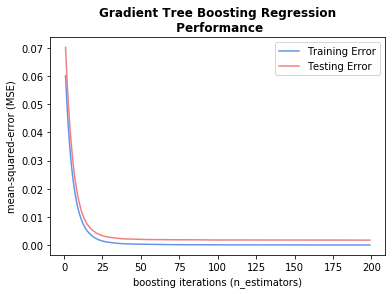

In [37]:
plt.plot(degrees,mse_train, c="cornflowerblue", label="Training Error")
plt.plot(degrees,mse_test, c="lightcoral", label="Testing Error")
plt.legend(loc='upper right')
plt.xlabel("boosting iterations (n_estimators)")
plt.ylabel("mean-squared-error (MSE)")
plt.title(f"Gradient Tree Boosting Regression\n Performance", weight='bold')
plt.show()

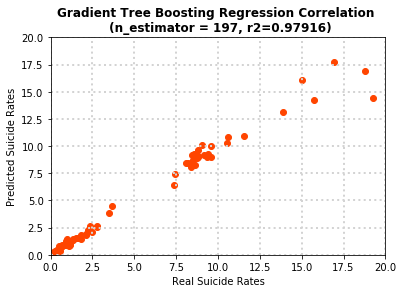

In [38]:
n_est = maxDeg
reg = GradientBoostingRegressor(n_estimators=n_est, random_state=0)
reg.fit(X_train_scaled, np.ravel(y_train_scaled))
predictions = reg.predict(X_test_scaled)

plt.scatter(y_test, y_scaler.inverse_transform(predictions.reshape(-1, 1)), color = "orangered")
plt.xlim(0,20)
plt.ylim(0,20)
plt.ylabel("Predicted Suicide Rates")
plt.xlabel("Real Suicide Rates")
plt.grid(color='lightgray', linestyle=':', linewidth=2)
plt.title(f"Gradient Tree Boosting Regression Correlation \n (n_estimator = {n_est}, r2={round(reg.score(X_test_scaled, y_test_scaled),5)})",weight="bold")
plt.show()

### 5th Model: Support Vector Machines

In [39]:
from sklearn.svm import SVR

# Radial Basis Fucntion (RBF)
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Linear
svr_lin = SVR(kernel='linear', C=100, gamma='auto')

# Polynomial
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)
#
model_color = ['orchid', 'lightseagreen', 'crimson']

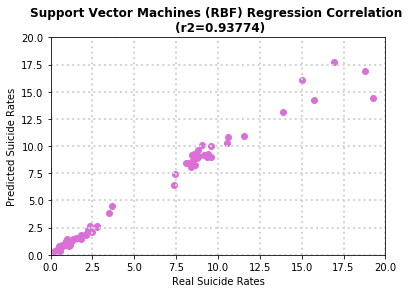

In [40]:
svr_rbf.fit(X_train_scaled, np.ravel(y_train_scaled))
svr_predictions = svr_rbf.predict(X_test_scaled)
MSE_test = mean_squared_error(y_test_scaled, svr_predictions)
r2=svr_rbf.score(X_test_scaled, y_test_scaled)

plt.scatter(y_test, y_scaler.inverse_transform(predictions.reshape(-1, 1)), color = model_color[0])
plt.xlim(0,20)
plt.ylim(0,20)
plt.ylabel("Predicted Suicide Rates")
plt.xlabel("Real Suicide Rates")
plt.grid(color='lightgray', linestyle=':', linewidth=2)
plt.title(f"Support Vector Machines (RBF) Regression Correlation \n (r2={round(r2,5)})",weight="bold")
plt.show()

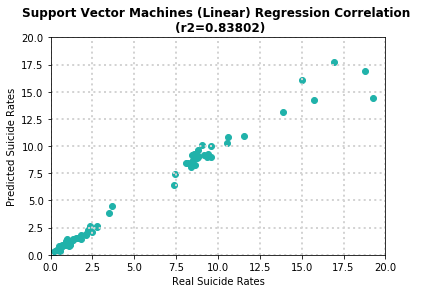

In [41]:
svr_lin.fit(X_train_scaled, np.ravel(y_train_scaled))
svr_predictions = svr_lin.predict(X_test_scaled)
MSE_test = mean_squared_error(y_test_scaled, svr_predictions)
r2=svr_lin.score(X_test_scaled, y_test_scaled)

plt.scatter(y_test, y_scaler.inverse_transform(predictions.reshape(-1, 1)), color = model_color[1])
plt.xlim(0,20)
plt.ylim(0,20)
plt.ylabel("Predicted Suicide Rates")
plt.xlabel("Real Suicide Rates")
plt.grid(color='lightgray', linestyle=':', linewidth=2)
plt.title(f"Support Vector Machines (Linear) Regression Correlation \n (r2={round(r2,5)})",weight="bold")
plt.show()

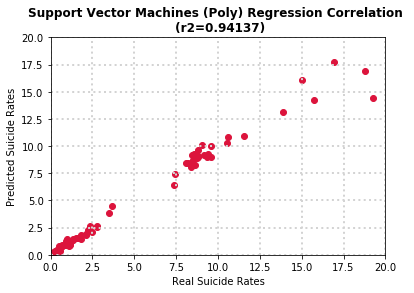

In [42]:
svr_poly.fit(X_train_scaled, np.ravel(y_train_scaled))
svr_predictions = svr_poly.predict(X_test_scaled)
MSE_test = mean_squared_error(y_test_scaled, svr_predictions)
r2=svr_poly.score(X_test_scaled, y_test_scaled)

plt.scatter(y_test, y_scaler.inverse_transform(predictions.reshape(-1, 1)), color = model_color[2])
plt.xlim(0,20)
plt.ylim(0,20)
plt.ylabel("Predicted Suicide Rates")
plt.xlabel("Real Suicide Rates")
plt.grid(color='lightgray', linestyle=':', linewidth=2)
plt.title(f"Support Vector Machines (Poly) Regression Correlation \n (r2={round(r2,5)})",weight="bold")
plt.show()